In [ ]:
#DOG CAT IMAGE CLASSIFICATION USING VGG16

In [ ]:
#importing important libraries for the project
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Flatten,Activation,Dense

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset from google drive
path="/content/drive/MyDrive/DL"

In [ ]:
import os
os.chdir(path)
os.getcwd()

'/content/drive/MyDrive/DL'

In [ ]:
#defining batch_size, img_width, img_height for the dataset images
batch_size=16
img_width=224
img_height=224

train_path = 'DL/train'
valid_path = 'DL/test'


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)


In [ ]:
for layer in vgg16.layers:
  print(layer)

In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
for layer in vgg16.layers:

  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/DL/train/*')


In [ ]:
folders

['/content/drive/MyDrive/DL/train/dog', '/content/drive/MyDrive/DL/train/cat']

In [ ]:
len(folders)

2

In [ ]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1106 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DL/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1012 images belonging to 2 classes.


In [ ]:
# fit the model
# training only on 5 epochs because we have less amount of data due to lack of resources(GPU) for computation 
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
35/35 [==============================] - 44s 962ms/step - loss: 1.9085 - accuracy: 0.5769 - val_loss: 0.4179 - val_accuracy: 0.8053
Epoch 2/5
35/35 [==============================] - 23s 666ms/step - loss: 0.3973 - accuracy: 0.8210 - val_loss: 0.3065 - val_accuracy: 0.8715
Epoch 3/5
35/35 [==============================] - 24s 699ms/step - loss: 0.3109 - accuracy: 0.8879 - val_loss: 0.2718 - val_accuracy: 0.8854
Epoch 4/5
35/35 [==============================] - 28s 806ms/step - loss: 0.3041 - accuracy: 0.8698 - val_loss: 0.3468 - val_accuracy: 0.8488
Epoch 5/5
35/35 [==============================] - 25s 703ms/step - loss: 0.2936 - accuracy: 0.8689 - val_loss: 0.2791 - val_accuracy: 0.8725


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

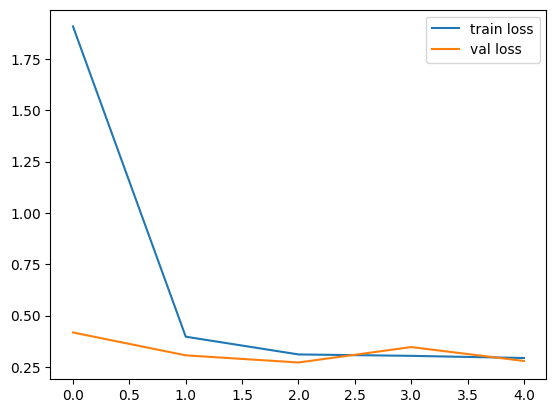

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

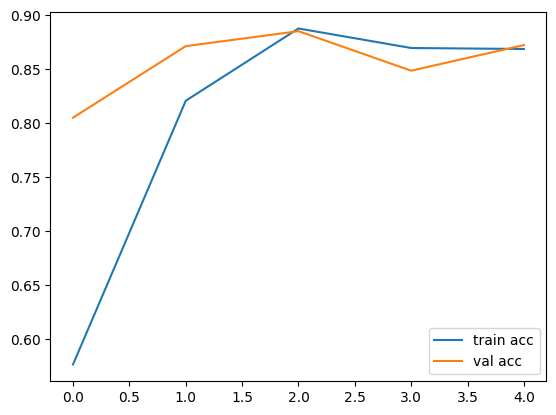

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

32/32 [==============================] - 6s 170ms/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('4608.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 44.,  45.,  39.],
        [ 44.,  45.,  39.],
        [ 46.,  47.,  41.],
        ...,
        [123., 123., 125.],
        [123., 121., 134.],
        [123., 121., 134.]],

       [[ 44.,  45.,  39.],
        [ 42.,  43.,  37.],
        [ 45.,  46.,  40.],
        ...,
        [120., 120., 122.],
        [122., 120., 131.],
        [122., 120., 131.]],

       [[ 44.,  45.,  40.],
        [ 42.,  43.,  38.],
        [ 45.,  46.,  41.],
        ...,
        [118., 118., 120.],
        [117., 116., 122.],
        [117., 116., 122.]],

       ...,

       [[208., 142., 130.],
        [200., 134., 122.],
        [211., 145., 133.],
        ...,
        [154.,  96.,  92.],
        [154.,  96.,  92.],
        [154.,  96.,  92.]],

       [[193., 127., 115.],
        [215., 149., 137.],
        [216., 150., 138.],
        ...,
        [146.,  88.,  84.],
        [148.,  90.,  86.],
        [149.,  91.,  87.]],

       [[217., 151., 139.],
        [203., 137., 125.],
        [207., 1

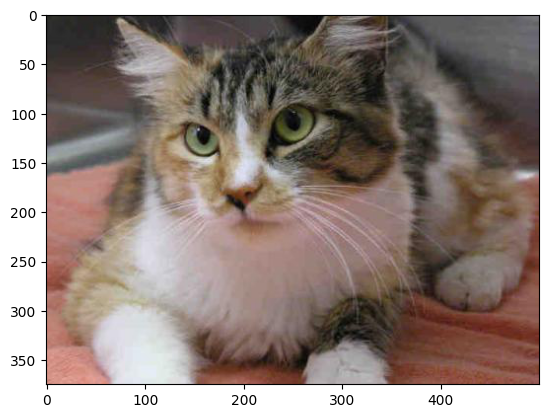

In [ ]:
Z = plt.imread('4608.jpg')
plt.imshow(Z)

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 609ms/step


array([[0.9983607 , 0.01108455]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
a

array([0])

In [ ]:
name = ['cat',
 'dog',]

In [ ]:
print("The predicted image is of",(name[a[0]]))

The predicted image is of cat


In [ ]:
"""Due to less GPU configuration, it was not able to import high number of images for dataset. 
Hence, performed CNN on 3000(approx)images
"""

'Due to less GPU configuration, it was not able to import high number of images for dataset. \nHence, performed CNN on 3000(approx)images\n'